[2025-05-23 Fiddler](https://thefiddler.substack.com/p/how-long-is-the-river-of-text)
====================

Fiddler
-------
If half of the words have 3 letters and half of the words have 4 letters, then, far
from the beginning or end of the line, for every 9 letters there should be 2 spaces,
so the probability that a character is a space is 2/9.

Extra credit
------------
I'll assume Fiddlish is written left-to-right and top to bottom, and I'll assume that
there are many lines.

I'll assume that diagonally means going right one character when going down one line.

Let $P(n)$ be the probability that the $n$th character of a line is a space and let
$L(n)$ be the length of a river starting from the $n$th character.

$$
\begin{aligned}
    L(n) &= 1 + P(n+1)L(n+1) \\
        &= 1 + \sum_{j=1}^\infty\prod_{k=1}^j P(n+k) \\
\end{aligned}
$$

$P(n)$ is nonzero when there exists whole numbers $j$ and $k$ such that
$n = 4j + 5k$.

If there is only one pair of $j,k$ such that $n = 4j+5k$, such as when $n=12$,
$j,k = 3,0$, $P(n) = \binom{j+k}j/2^{j+k}$.

However, if $j,k$ results in a space at $n$, then $j+5m,k-4m$, where $m$ is an integer,
also results in a space at $n$ when $j+5m \ge 0$ and $k-4m \ge 0$.

Working out by hand the early cases for which only a single pair of $j,k$ is possible.

|$n$|$j$|$k$|$P$|
|---|---|---|---|
|13 |2  |1  |3/8|
|14 |1  |2  |3/8|
|15 |0  |3  |1/8|
|16 |4  |0  |1/16|
|17 |3  |1  |4/16|
|18 |2  |2  |6/16|
|19 |1  |3  |4/16|

When $n = 20$, $j,k = 5,0$ or $0,4$.  Considering the first 5 words, the probability
of $0,5$ is $1/32$, and the probability of $4,0$ in the first 4 is $1/16\cdot(1/2+1/2) = 1/16$,
so $P(20) = 1/32 + 1/16 = 3/32$.

So, in general,

$$ P(n) = \sum_{j=0}^\infty\sum_{k=0}^\infty \delta_{n,4j+5k}\frac{\binom{j+k}{j}}{2^{j+k}} $$

Since $j \le n/4$ and $k \le n/5$,

$$ P(n) = \sum_{j=0}^{n/4}\sum_{k=0}^{n/5} \delta_{n,4j+5k}\frac{\binom{j+k}{j}}{2^{j+k}} $$

In [1]:
j,k = var("j,k")
P(n) = sum(sum(kronecker_delta(n,4*j+5*k)*binomial(j+k,j)/2^(j+k),j,0,n/4),k,0,n/5)
show(P)

n |--> sum(sum(2^(-j - k)*binomial(j + k, j)*kronecker_delta(4*j + 5*k, n), j, 0, 1/4*n), k, 0, 1/5*n)

In [2]:
l,m = var("l,m")
L(n) = 1 + sum(product(P(n+m),m,1,l),l,1,oo)
show(L)

n |--> sum(product(sum(sum(2^(-j - k)*binomial(j + k, j)*kronecker_delta(4*j + 5*k, m + n), j, 0, 1/4*m + 1/4*n), k, 0, 1/5*m + 1/5*n), m, 1, l), l, 1, +Infinity) + 1

In [3]:
show(L(12).simplify_full())

sum(product(sum(sum(2^(-j - k)*factorial(j + k)*kronecker_delta(4*j + 5*k, m + 12)/(factorial(j)*factorial(k)), j, 0, 1/4*m + 3), k, 0, 1/5*m + 12/5), m, 1, l), l, 1, +Infinity) + 1

I don't know how to make sense of that, so consider partial sums

In [4]:
Lt(n,p) = 1 + sum(product(P(n+m),m,1,l),l,1,p)
[(Lt(12,p).simplify(),numerical_approx(Lt(12,p).simplify())) for p in [1..20]]

[(11/8, 1.37500000000000),
 (97/64, 1.51562500000000),
 (785/512, 1.53320312500000),
 (12569/8192, 1.53430175781250),
 (50285/32768, 1.53457641601562),
 (402307/262144, 1.53467941284180),
 (1609255/1048576, 1.53470516204834),
 (51496241/33554432, 1.53470757603645),
 (1647880117/1073741824, 1.53470795322210),
 (26366083897/17179869184, 1.53470807109261),
 (421857352477/274877906944, 1.53470810792714),
 (26998870669903/17592186044416, 1.53470811425808),
 (215990965470599/140737488355328, 1.53470811504945),
 (13823421791788961/9007199254740992, 1.53470811523492),
 (221174748676976501/144115188075855872, 1.53470811529289),
 (28310367830911939003/18446744073709551616, 1.53470811530692),
 (3623727082361648183009/2361183241434822606848, 1.53470811530901),
 (463837066542404127209527/302231454903657293676544, 1.53470811530938),
 (59371144517431688875272581/38685626227668133590597632, 1.53470811530948),
 (15199012996462793554133952611/9903520314283042199192993792,
  1.53470811530951)]

It looks like the partial sums for $L(12)$ converge to approximately 1.5347.

[Numerical simulations](20250523.go) agree:

    $ go run 20250523.go
    12279141/8000000 1.534893

Additional thoughts
-------------------
If Fiddlish were right-to-left, every river starting from the
twelfth character would have length 1 because $P(11) = 0$.

If diagonally means going $r$ characters to the right when going
down 1 row, then $L(n) = 1 + P(n+r)L(n+r)$.

When $n$ is large, then $P(n) \approx 2/9$, so $L(n) \approx 9/7$.

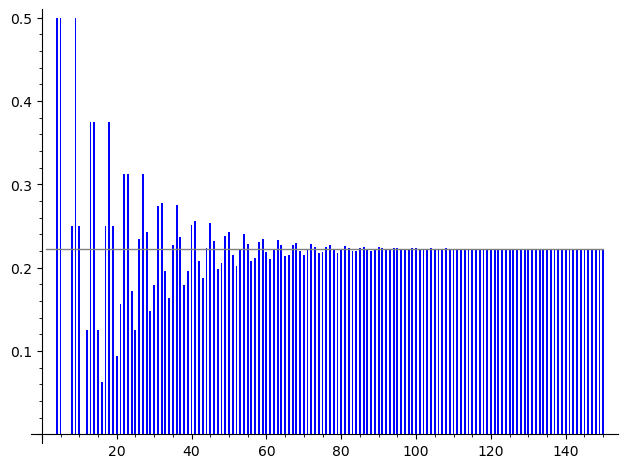

In [5]:
b = [numerical_approx(P(n).simplify()) for n in [0..150]]
b[0] = 0
plot(2/9,xmin=1,xmax=150,color='gray') + bar_chart(b)